# Introduction

Notebook to aggregate the running of models in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Union Strategy

In [2]:
models_runner_1 = Feat_BR_Models_Runner()
lsi_model_1 = models_runner_1.run_lsi_model()
lda_model_1 = models_runner_1.run_lda_model()
bm25_model_1 = models_runner_1.run_bm25_model()
w2v_model_1 = models_runner_1.run_word2vec_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)
lsi_eval_1 = evaluator_1.run_evaluator(model=lsi_model_1)
lda_eval_1 = evaluator_1.run_evaluator(model=lda_model_1)
bm25_eval_1 = evaluator_1.run_evaluator(model=bm25_model_1)
w2v_eval_1 = evaluator_1.run_evaluator(model=w2v_model_1)

Features.shape: (21, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Expert and Volunteers Matrix UNION.shape: (91, 21)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [3]:
evaluator_1.get_evaluations_df()

,model,ref_name,perc_precision,perc_recall,perc_fscore
0,lsi,top_1_cosine_0.0,42.86,31.55,34.70
1,lsi,top_3_cosine_0.0,26.74,53.55,33.73
2,lsi,top_5_cosine_0.0,18.46,59.55,26.75
3,lsi,top_10_cosine_0.0,11.43,71.87,18.85
4,lda,top_1_cosine_0.0,41.76,29.72,33.05
5,lda,top_3_cosine_0.0,20.15,41.25,25.43
6,lda,top_5_cosine_0.0,15.38,50.39,22.24
7,lda,top_10_cosine_0.0,11.32,69.97,18.64
8,bm25,top_1_cosine_0.0,37.36,26.36,29.31
9,bm25,top_3_cosine_0.0,24.18,49.12,30.72


### Plots

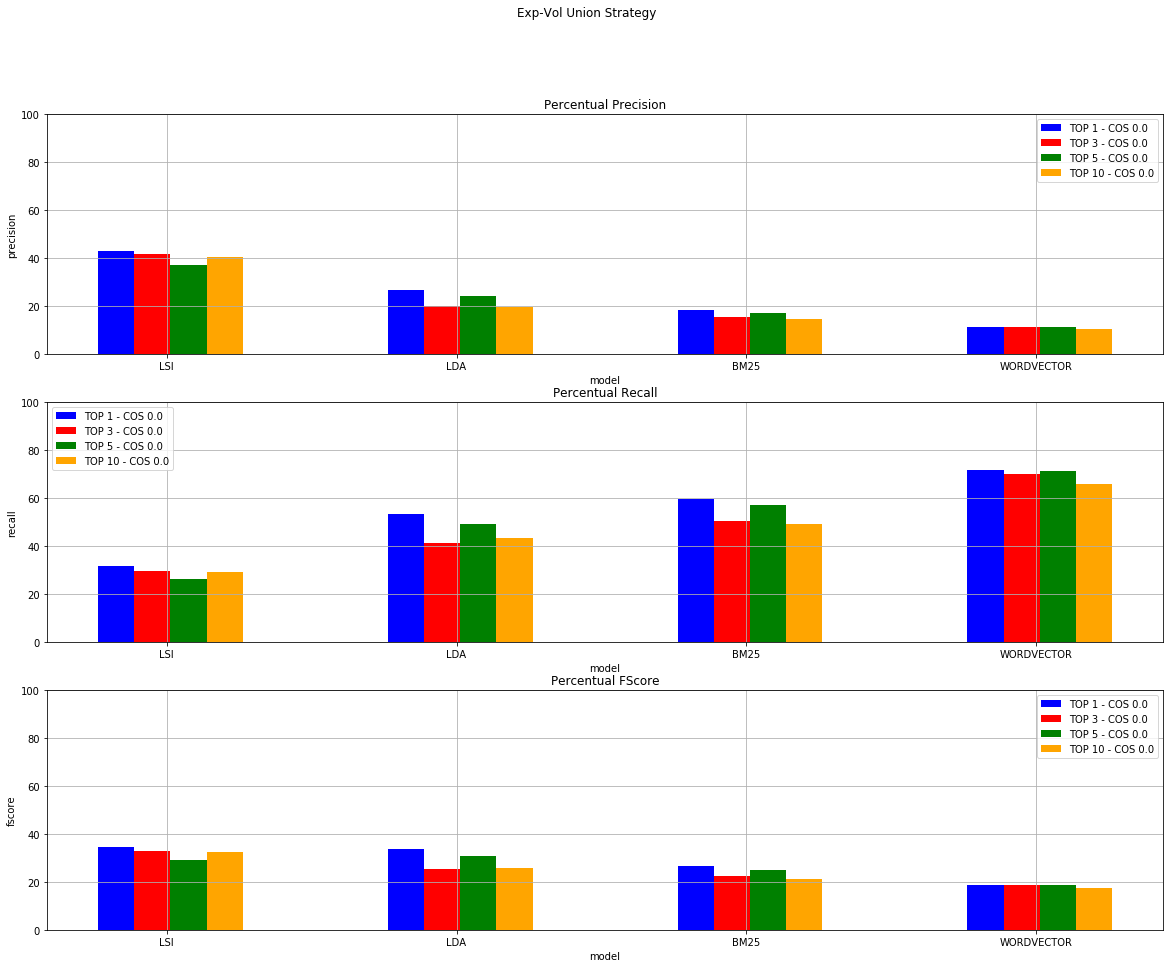

In [4]:
evaluator_1.plot_evaluations(title='Exp-Vol Union Strategy')

### Delete Variables

In [5]:
del lsi_model_1, lda_model_1, bm25_model_1, w2v_model_1
del lsi_eval_1, lda_eval_1, bm25_eval_1, w2v_eval_1
del models_runner_1, evaluator_1

## Intersec Strategy

In [6]:
models_runner_2 = Feat_BR_Models_Runner()
lsi_model_2 = models_runner_2.run_lsi_model()
lda_model_2 = models_runner_2.run_lda_model()
bm25_model_2 = models_runner_2.run_bm25_model()
w2v_model_2 = models_runner_2.run_word2vec_model()

evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df().T)
lsi_eval_2 = evaluator_2.run_evaluator(model=lsi_model_2)
lda_eval_2 = evaluator_2.run_evaluator(model=lda_model_2)
bm25_eval_2 = evaluator_2.run_evaluator(model=bm25_model_2)
w2v_eval_2 = evaluator_2.run_evaluator(model=w2v_model_2)

Features.shape: (21, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Expert and Volunteers Matrix INTERSEC.shape: (91, 21)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [7]:
evaluator_2.get_evaluations_df()

,model,ref_name,perc_precision,perc_recall,perc_fscore
0,lsi,top_1_cosine_0.0,26.37,25.82,26.01
1,lsi,top_3_cosine_0.0,13.19,38.46,19.56
2,lsi,top_5_cosine_0.0,7.91,38.46,13.08
3,lsi,top_10_cosine_0.0,3.96,38.46,7.16
4,lda,top_1_cosine_0.0,21.98,21.43,21.61
5,lda,top_3_cosine_0.0,8.42,24.18,12.42
6,lda,top_5_cosine_0.0,5.71,27.47,9.42
7,lda,top_10_cosine_0.0,3.63,35.16,6.56
8,bm25,top_1_cosine_0.0,19.78,19.23,19.41
9,bm25,top_3_cosine_0.0,10.99,32.42,16.37


### Plots

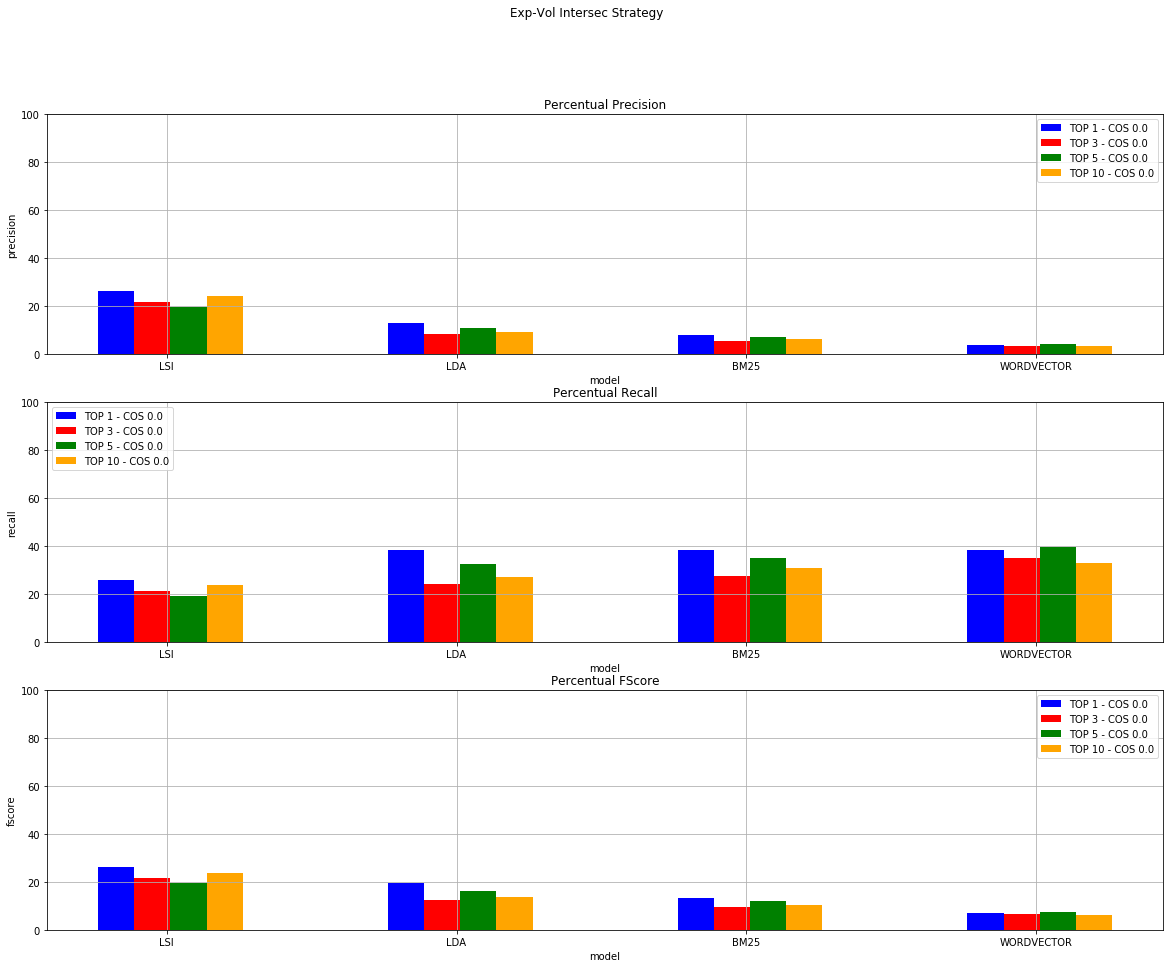

In [8]:
evaluator_2.plot_evaluations(title='Exp-Vol Intersec Strategy')

### Delete Variables

In [9]:
del lsi_model_2, lda_model_2, bm25_model_2, w2v_model_2
del lsi_eval_2, lda_eval_2, bm25_eval_2, w2v_eval_2
del models_runner_2, evaluator_2

## Expert Only Strategy

In [10]:
models_runner_3 = Feat_BR_Models_Runner()
lsi_model_3 = models_runner_3.run_lsi_model()
lda_model_3 = models_runner_3.run_lda_model()
bm25_model_3 = models_runner_3.run_bm25_model()
w2v_model_3 = models_runner_3.run_word2vec_model()

evaluator_3 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_df().T)
lsi_eval_3 = evaluator_3.run_evaluator(model=lsi_model_3)
lda_eval_3 = evaluator_3.run_evaluator(model=lda_model_3)
bm25_eval_3 = evaluator_3.run_evaluator(model=bm25_model_3)
w2v_eval_3 = evaluator_3.run_evaluator(model=w2v_model_3)

Features.shape: (21, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Feat_BR Expert Matrix shape: (91, 21)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [11]:
evaluator_3.get_evaluations_df()

,model,ref_name,perc_precision,perc_recall,perc_fscore
0,lsi,top_1_cosine_0.0,40.66,37.73,38.64
1,lsi,top_3_cosine_0.0,20.88,55.13,29.74
2,lsi,top_5_cosine_0.0,12.97,56.04,20.71
3,lsi,top_10_cosine_0.0,6.70,58.24,11.90
4,lda,top_1_cosine_0.0,34.07,31.68,32.42
5,lda,top_3_cosine_0.0,13.55,36.08,19.38
6,lda,top_5_cosine_0.0,9.01,40.48,14.56
7,lda,top_10_cosine_0.0,5.82,51.28,10.36
8,bm25,top_1_cosine_0.0,30.77,28.39,29.12
9,bm25,top_3_cosine_0.0,17.58,47.44,25.24


### Plots

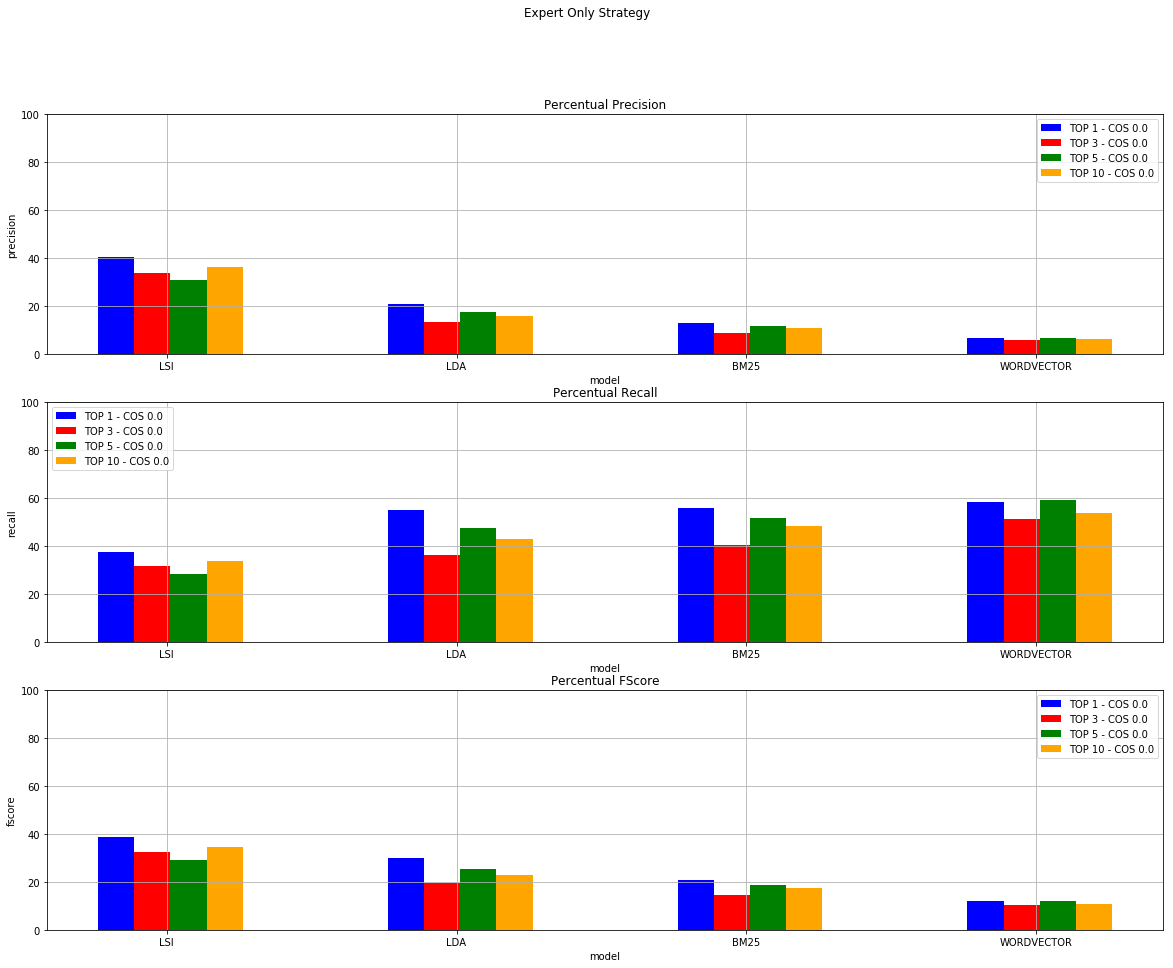

In [12]:
evaluator_3.plot_evaluations(title='Expert Only Strategy')

### Delete Variables

In [13]:
del lsi_model_3, lda_model_3, bm25_model_3, w2v_model_3
del lsi_eval_3, lda_eval_3, bm25_eval_3, w2v_eval_3
del models_runner_3, evaluator_3

## Volunteers Only Strategy

In [14]:
models_runner_4 = Feat_BR_Models_Runner()
lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

evaluator_4 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T)
lsi_eval_4 = evaluator_4.run_evaluator(model=lsi_model_4)
lda_eval_4 = evaluator_4.run_evaluator(model=lda_model_4)
bm25_eval_4 = evaluator_4.run_evaluator(model=bm25_model_4)
w2v_eval_4 = evaluator_4.run_evaluator(model=w2v_model_4)

Features.shape: (21, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Feat_BR Volunteers Matrix shape: (91, 21)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [15]:
evaluator_4.get_evaluations_df()

,model,ref_name,perc_precision,perc_recall,perc_fscore
0,lsi,top_1_cosine_0.0,28.57,24.50,25.47
1,lsi,top_3_cosine_0.0,19.05,45.95,25.54
2,lsi,top_5_cosine_0.0,13.41,52.68,20.25
3,lsi,top_10_cosine_0.0,8.68,63.81,14.54
4,lda,top_1_cosine_0.0,29.67,26.69,27.30
5,lda,top_3_cosine_0.0,15.02,37.49,20.32
6,lda,top_5_cosine_0.0,12.09,47.19,18.16
7,lda,top_10_cosine_0.0,9.12,67.32,15.31
8,bm25,top_1_cosine_0.0,26.37,21.79,22.72
9,bm25,top_3_cosine_0.0,17.58,43.72,23.96


### Plots

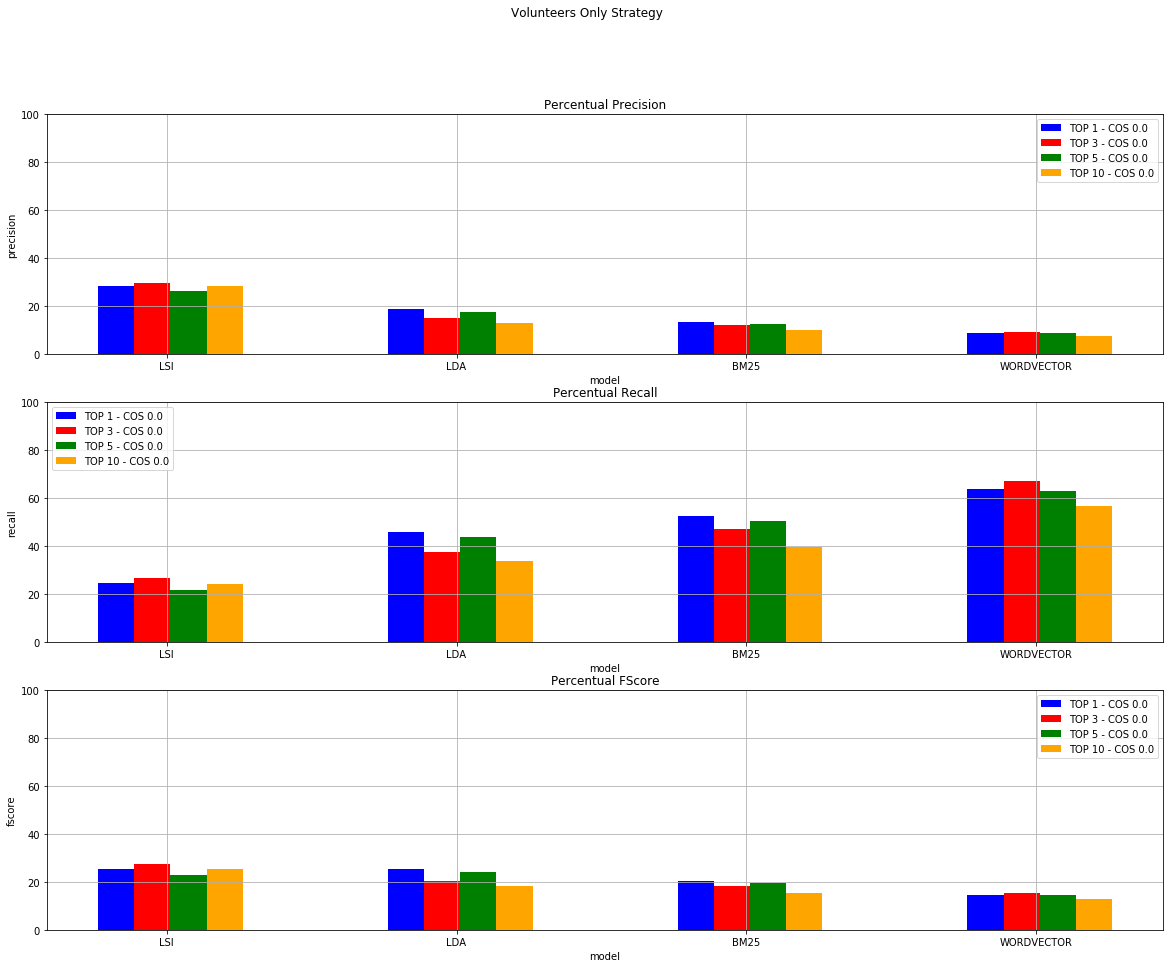

In [16]:
evaluator_4.plot_evaluations(title='Volunteers Only Strategy')

### Delete Variables

In [17]:
del lsi_model_4, lda_model_4, bm25_model_4, w2v_model_4
del lsi_eval_4, lda_eval_4, bm25_eval_4, w2v_eval_4
del models_runner_4, evaluator_4